# Mileage Prediction 

 Rohit Suvarna(rus209)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LinearRegression
from sklearn.metrics import mean_squared_error as msq
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [2]:
df_test = pd.read_csv('/Users/rohitsuvarna/Downloads/auto_test.csv')
df_train = pd.read_csv('/Users/rohitsuvarna/Downloads/auto_train.csv')

### Q1) Plot the mpg vs distance graph

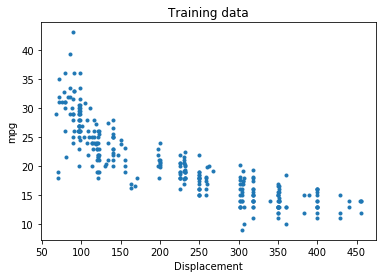

In [3]:
plt.plot(df_train["displacement"],df_train['mpg'],'.')
plt.xlabel("Displacement")
plt.ylabel("mpg")
plt.title('Training data')
plt.show()

### Q2) Simple Linear Regression 

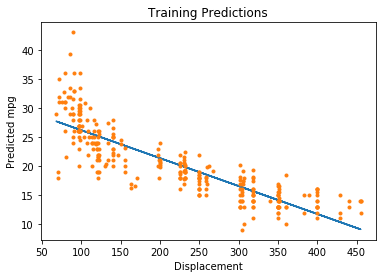

In [4]:
X = df_train['displacement'].as_matrix()
y = df_train['mpg'].as_matrix()

X = X.reshape((X.shape[0],1))
y = y.reshape((y.shape[0],1))

regr = LinearRegression()

regr.fit(X,y)

X_test = df_test['displacement'].as_matrix()
X_test = X_test.reshape((X_test.shape[0],1))

y_test = df_test['mpg'].as_matrix()
y_test = y_test.reshape((y_test.shape[0],1))

y_pred_train = regr.predict(X)
y_pred_test = regr.predict(X_test)

plt.plot(X,y_pred_train)
plt.plot(X,y,'.')
plt.xlabel("Displacement")
plt.ylabel("Predicted mpg")
plt.title("Training Predictions")
plt.show()

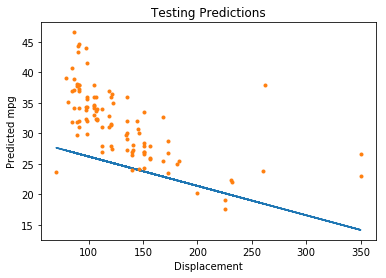

In [5]:
plt.plot(X_test,y_pred_test)
plt.plot(X_test,y_test,'.')
plt.xlabel("Displacement")
plt.ylabel("Predicted mpg")
plt.title("Testing Predictions")
plt.show()

In [6]:
training_err = msq(y,y_pred_train)*len(y)*0.5
testing_err = msq(y_test,y_pred_test)*len(y_test)*0.5

print(training_err)

print(testing_err)

1557.33098999
3565.75515444


### Q3) Polynomial Regression

In [7]:
poly2 = PolynomialFeatures(degree=2)
poly4 = PolynomialFeatures(degree=4)
poly6 = PolynomialFeatures(degree=6)

poly2_test = PolynomialFeatures(degree=2)
poly4_test = PolynomialFeatures(degree=4)
poly6_test = PolynomialFeatures(degree=6)

X2 = poly2.fit_transform(X)
X4 = poly4.fit_transform(X)
X6 = poly6.fit_transform(X)

X2_test = poly2_test.fit_transform(X_test)
X4_test = poly4_test.fit_transform(X_test)
X6_test = poly6_test.fit_transform(X_test)

regr2 = LinearRegression()
regr4 = LinearRegression()
regr6 = LinearRegression()

regr2.fit(X2,y)
regr4.fit(X4,y)
regr6.fit(X6,y)

y2_pred_train = regr2.predict(X2)
y2_pred_test = regr2.predict(X2_test)

y4_pred_train = regr4.predict(X4)
y4_pred_test = regr4.predict(X4_test)

y6_pred_train = regr6.predict(X6)
y6_pred_test = regr6.predict(X6_test)


Degree 2


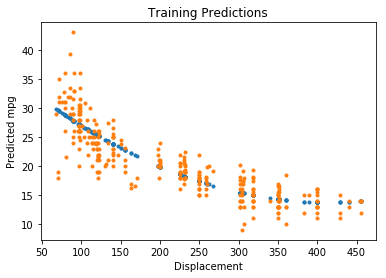

In [8]:
plt.plot(X,y2_pred_train,'.')
plt.plot(X,y,'.')
plt.xlabel("Displacement")
plt.ylabel("Predicted mpg")
plt.title("Training Predictions")
plt.show()

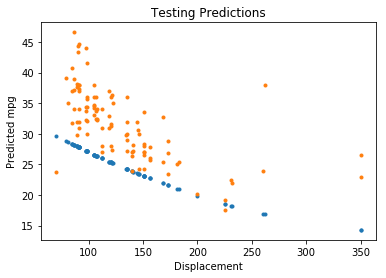

In [9]:
plt.plot(X_test,y2_pred_test,'.')
plt.plot(X_test,y_test,'.')
plt.xlabel("Displacement")
plt.ylabel("Predicted mpg")
plt.title("Testing Predictions")
plt.show()

In [10]:
training_err = msq(y,y2_pred_train)*len(y)*0.5
testing_err = msq(y_test,y2_pred_test)*len(y_test)*0.5

print(training_err)

print(testing_err)

1296.01058799
3282.09475116


Degree 4

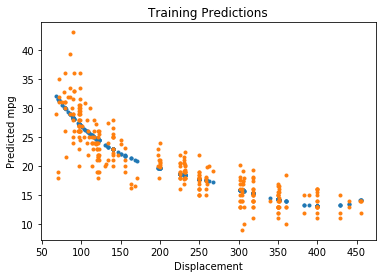

In [11]:
plt.plot(X,y4_pred_train,'.')
plt.plot(X,y,'.')
plt.xlabel("Displacement")
plt.ylabel("Predicted mpg")
plt.title("Training Predictions")
plt.show()

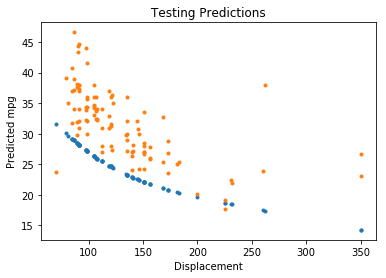

In [12]:
plt.plot(X_test,y4_pred_test,'.')
plt.plot(X_test,y_test,'.')
plt.xlabel("Displacement")
plt.ylabel("Predicted mpg")
plt.title("Testing Predictions")
plt.show()

In [13]:
training_err = msq(y,y4_pred_train)*len(y)*0.5
testing_err = msq(y_test,y4_pred_test)*len(y_test)*0.5

print(training_err)

print(testing_err)

1242.23889296
3411.64000136


Degree 6

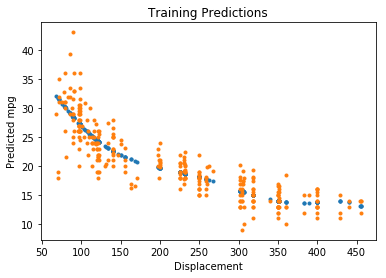

In [14]:
plt.plot(X,y6_pred_train,'.')
plt.plot(X,y,'.')
plt.xlabel("Displacement")
plt.ylabel("Predicted mpg")
plt.title("Training Predictions")
plt.show()

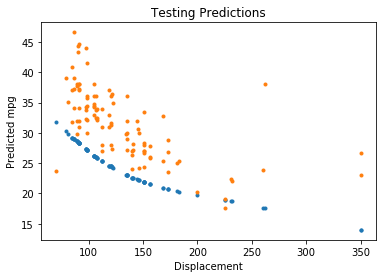

In [15]:
plt.plot(X_test,y6_pred_test,'.')
plt.plot(X_test,y_test,'.')
plt.xlabel("Displacement")
plt.ylabel("Predicted mpg")
plt.title("Testing Predictions")
plt.show()

In [16]:
training_err = msq(y,y6_pred_train)*len(y)*0.5
testing_err = msq(y_test,y6_pred_test)*len(y_test)*0.5

print(training_err)

print(testing_err)

1219.71902014
3445.12492549


### Q4) Multiple Linear Regression

In [17]:
X_train = df_train[['displacement','horsepower']].as_matrix()
y_train = y
X_test = df_test[['displacement','horsepower']].as_matrix()

regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

test_err = msq(y_test,y_pred)*len(y_test)*0.5

print(test_err)

3443.39350363


### Q5) K-Nearest Neighbours

In [311]:
from scipy.spatial import distance

def K_Nearest(x_test, X_train,y_train, k):
    size = X_train.shape[0]
    dist_arr = np.zeros((size,1))
    for i in range(size):
        dist_arr[i,:] = distance.euclidean(x_test,X_train[i,:])
    y_copy = y_train.copy()
    total = 0
    for i in range(k):
        ind_min = np.argmin(dist_arr)
        total += y_copy[ind_min][0]
        #print(total)
        dist_arr = np.delete(dist_arr,ind_min)
        y_copy = np.delete(y_copy,ind_min)
        y_copy = y_copy.reshape((y_copy.shape[0],1))
    return total/k
        

k = 1

In [312]:
y_pred = np.zeros((y_test.shape[0],1))
for i in range(X_test.shape[0]):
    y_pred[i,:] = K_Nearest(X_test[i,:],X_train,y_train,1)
    

In [313]:
test_err = msq(y_test,y_pred)*len(y_test)*0.5
test_err

2868.0049999999997

k = 3

In [314]:
y_pred = np.zeros((y_test.shape[0],1))
for i in range(X_test.shape[0]):
    y_pred[i,:] = K_Nearest(X_test[i,:],X_train,y_train,3)

In [315]:
test_err = msq(y_test,y_pred)*len(y_test)*0.5
test_err

2794.7299999999991

k = 20

In [316]:
y_pred = np.zeros((y_test.shape[0],1))
for i in range(X_test.shape[0]):
    y_pred[i,:] = K_Nearest(X_test[i,:],X_train,y_train,20)

In [317]:
test_err = msq(y_test,y_pred)*len(y_test)*0.5
test_err

2746.1914124999998

### Q7) Variation of K-nearest with chebyshev distance and weighted average

In [274]:
def K_Nearest_var(x_test, X_train,y_train, k):
    size = X_train.shape[0]
    dist_arr = np.zeros((size,1))
    for i in range(size):
        dist_arr[i,:] = distance.chebyshev(x_test,X_train[i,:])
    y_copy = y_train.copy()
    total = 0
    denom = 0
    for i in range(k):
        ind_min = np.argmin(dist_arr)
        if dist_arr[ind_min] ==0:
            return y_copy[ind_min][0]
        total += y_copy[ind_min][0]/dist_arr[ind_min][0]
        denom += 1/dist_arr[ind_min][0]
        dist_arr = np.delete(dist_arr,ind_min)
        dist_arr = dist_arr.reshape((dist_arr.shape[0],1))
        y_copy = np.delete(y_copy,ind_min)
        y_copy = y_copy.reshape((y_copy.shape[0],1))
    return total/denom

In [275]:
y_pred = np.zeros((y_test.shape[0],1))
for i in range(X_test.shape[0]):
    y_pred[i,:] = K_Nearest_var(X_test[i,:],X_train,y_train,20)

In [277]:
test_err = msq(y_test,y_pred)*len(y_test)*0.5
test_err

2573.6303068941379